Let $Z\sim N(0,1)$.
Find $\mathbb{P} (|Z| > t)$ and plot this as a function of $t$.
From Markov's inequality, we have the bound $P( |Z| > t) \leqslant \frac{ \mathbb{E} {|Z|}^k }{t^k}$
for any integer $k > 0$.
Plot the bounds for $k=1,2,3,4,5$ and compare them to the true values of $P(|Z|>t)$.
Also, plot the bound from Mill's inequality.

In [5]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import norm

# Change default plot size
plt.rcParams['figure.figsize'] = [10, 5]

Below we call the function $t\mapsto \mathbb{P} (|Z| > t)$ the *outlier probability*.
Note also that we use the following explicit values for the first five moments of the standard normal distribution:

$$
    E [ {|Z|} ] = \sqrt{\frac{2}{\pi}},\,
    E [ {|Z|}^2 ] = 1,\,
    E [ {|Z|}^3 ] = 2 \sqrt{\frac{2}{\pi}},\,
    E [ {|Z|}^4 ] = 3, \text{ and }
    E [ {|Z|}^5 ] = 8 \sqrt{\frac{2}{\pi}}.
$$

In [2]:
def plot_all(tmax=5, t_num=100):

    # Record the (absolute, non-centered) moments
    c = np.sqrt(2/np.pi)
    moments = (c, 1, 2*c, 3, 8*c)

    # The Markov / moments bounds
    for k in range(1, 6):
        t = np.linspace(0.01, tmax, t_num)
        markov_decay = moments[k-1]/(t**k)
        plt.plot(t, markov_decay, label=f"Markov bound (k ={k})")

    # The Mill bound
    mills_bound = c*np.exp(-t**2/2)/t
    plt.plot(t, mills_bound, label="Mill's bound")

    # The exact outlier probability
    outlier_probability = 2*(norm.sf(t))
    plt.plot(t, outlier_probability, label="Outlier probability")

    plt.ylim(top=1, bottom=0)
    plt.legend()

    plt.show()

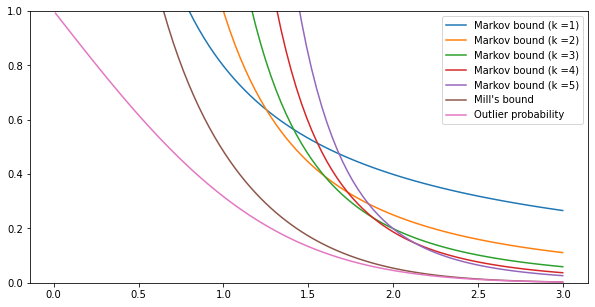

In [7]:
plot_all(tmax=3, t_num=100)